# Vizulation WDI dataset

In [71]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

Import the WDI dataset

In [72]:
df = pd.read_csv('WDIData.csv', sep=',') 
df = df.drop('Unnamed: 66', axis=1)

selected_indicators = ['GDP growth (annual %)',
                       'Individuals using the Internet (% of population)',
                       'Foreign direct investment, net inflows (BoP, current US$)',
                       'GNI per capita, PPP (current international $)']

df = df[df['Indicator Name'].isin(selected_indicators)]

df.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
455,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.463634e+10,2.153424e+10,2.768142e+10,2.877423e+10,1.663278e+10,1.003544e+10,1.359147e+10,1.382234e+10,1.257987e+10,NaN
470,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.239594,7.980768,5.164334,4.579952,5.327717,...,9.230672e-01,4.200209e+00,3.984387e+00,2.952845e+00,2.217017e+00,2.557135e+00,2.485244e+00,2.025941e+00,-2.886856e+00,4.303667


For effective data analysis we need the data in the wide format but with the variable names in the columns

In [73]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')

df_wide = df_long.pivot_table(index=['Year', 'Country Name', 'Country Code'], 
                              columns='Indicator Name', values='Value', aggfunc='first')

df = df_wide.reset_index()
df

Indicator Name,Year,Country Name,Country Code,"Foreign direct investment, net inflows (BoP, current US$)",GDP growth (annual %),"GNI per capita, PPP (current international $)",Individuals using the Internet (% of population)
0,1960,Botswana,BWA,NaN,NaN,NaN,0.0
1,1960,Burundi,BDI,NaN,NaN,NaN,0.0
2,1960,Grenada,GRD,NaN,NaN,NaN,0.0
3,1960,Maldives,MDV,NaN,NaN,NaN,0.0
4,1960,Syrian Arab Republic,SYR,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
13601,2021,West Bank and Gaza,PSE,NaN,7.050451,7370.0,NaN
13602,2021,"Yemen, Rep.",YEM,NaN,-2.061513,NaN,NaN
13603,2021,Serbia,SRB,NaN,7.389271,20610.0,NaN
13604,2021,Montenegro,MNE,NaN,12.434359,23280.0,NaN


## Plot data

Testing plot

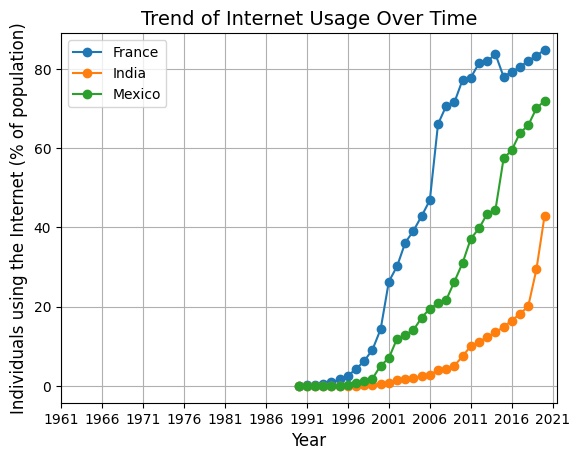

array(['Botswana', 'Burundi', 'Grenada', 'Maldives',
       'Syrian Arab Republic', 'Thailand', 'Togo',
       'Africa Eastern and Southern', 'Africa Western and Central',
       'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas, The',
       'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia',
       'Brazil', 'Burkina Faso', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Denmark', 'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 'Fiji', 'Finland', 'France', 'Gabon', 'Ghana',
       'Greece', 'Guatemala', 'Guyana', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Honduras', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA t

In [89]:
country_groups = ["France",
                  "India",
                  "Mexico"]

df_groups = df[df['Country Name'].isin(country_groups)]

for group in country_groups:
    group_data = df_groups[df_groups['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['Individuals using the Internet (% of population)'], marker='o', linestyle='-', label=group)

plt.title('Trend of Internet Usage Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Individuals using the Internet (% of population)', fontsize=12)
locs, labels = plt.xticks() 
plt.xticks(locs[::5], df_groups['Year'].unique()[::5])
plt.legend()
plt.grid(True)
plt.show()

unique_values = df['Country Name'].unique()
unique_values



There is a strong relation between GNI and internet usage

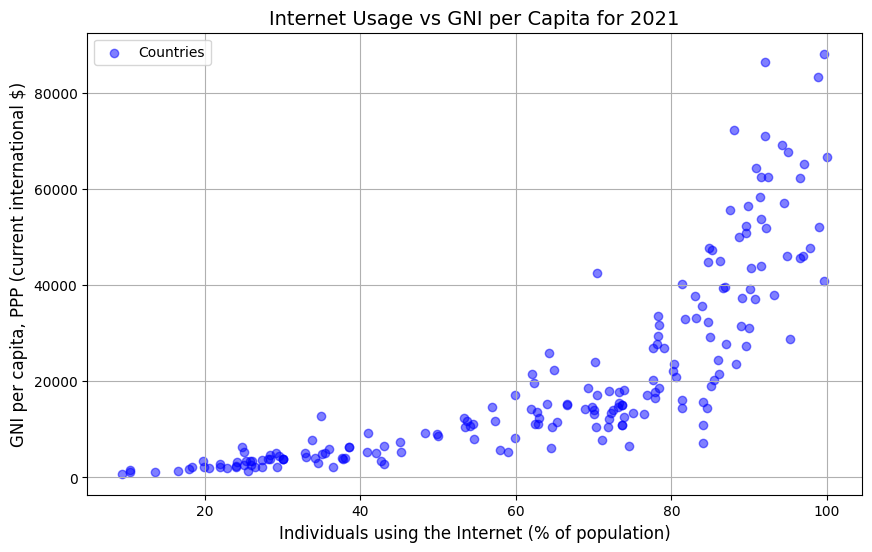

In [79]:
df_2020 = df[df['Year'] == '2020']

plt.scatter(df_2020['Individuals using the Internet (% of population)'], 
            df_2020['GNI per capita, PPP (current international $)'],
            alpha=0.5,
            color='blue')
plt.title('Internet Usage vs GNI per Capita for 2021', fontsize=14)
plt.xlabel('Individuals using the Internet (% of population)', fontsize=12)
plt.ylabel('GNI per capita, PPP (current international $)', fontsize=12)
plt.legend(['Countries'], loc='upper left')
plt.grid(True)
plt.show()
